
# <span style="font-family:Georgia; text-align:center;">Actividad: Modelo presa–depredador y métodos numéricos</span> 

<span style="font-family:Georgia;">

**Objetivo.** Explorar el modelo presa–depredador de Lotka–Volterra con parámetros generales e implementar tres métodos numéricos para resolverlo:
1) Euler explícito, 2) Euler implícito (con *predictor–corrector*), y 3) Método del trapecio (también *predictor–corrector*).

**Entregables.**
- Celdas con sus respuestas a las preguntas teóricas (puntos fijos, linealización y comportamiento local).
- Implementaciones de los 3 métodos y gráficas solicitadas.
- Breve discusión de hallazgos (estabilidad, precisión y comportamiento cualitativo).


# <span style="font-family:Georgia; text-align:center;">Modelo y preguntas teóricas</span> 
<span style="font-family:Georgia;">


Consideren el sistema de Lotka–Volterra con parámetros positivos $ \alpha, \beta, \gamma, \delta > 0 $:
$$
\begin{aligned}
\frac{dx}{dt} &= x\,(\alpha - \beta\,y),\\[4pt]
\frac{dy}{dt} &= y\,(-\gamma + \delta\,x).
\end{aligned}
$$

Aquí $x(t)$ representa la población de presas y $y(t)$ la de depredadores. Las constantes tienen la interpretación típica:
- $ \alpha $: tasa de crecimiento de presas en ausencia de depredadores.
- $ \beta $: tasa efectiva de depredación (encuentros presa–depredador).
- $ \gamma $: tasa de muerte de depredadores en ausencia de presas.
- $ \delta $: eficiencia de conversión de presas en nuevos depredadores.

### 1.a) Preguntas de interpretación
- ¿Qué efecto cualitativo esperarían al **aumentar** $ \alpha $? ¿Y al **disminuir** $ \gamma $?
- Si $ \beta $ aumenta, ¿qué cambios esperan en las trayectorias del plano fase?
- ¿Por qué **todas** las constantes deben ser **positivas** en este modelo?

### 1.b) Puntos de equilibrio
1. Encuentren **todos** los puntos de equilibrio resolviendo $ \frac{dx}{dt} = 0 $ y $ \frac{dy}{dt} = 0 $.
2. Escriban su(s) respuesta(s) en la celda siguiente.


### 1.c) Linealización y análisis local
1. Calculen la **matriz Jacobiana**
$$
J(x,y) \;=\;
\begin{pmatrix}
\frac{\partial}{\partial x}\big[x(\alpha-\beta y)\big] & \frac{\partial}{\partial y}\big[x(\alpha-\beta y)\big]\\[4pt]
\frac{\partial}{\partial x}\big[y(-\gamma+\delta x)\big] & \frac{\partial}{\partial y}\big[y(-\gamma+\delta x)\big]
\end{pmatrix}.
$$
2. Evalúen $ J $ en **cada** punto de equilibrio y clasifíquenlos (silla, centro, nodo, foco), justificando con autovalores.
3. Concluyan sobre el **comportamiento local** cerca de los equilibrios.


## <span style="font-family:Georgia; text-align:center;">Invariante</span> 
<span style="font-family:Georgia;">

Para el sistema de Lotka–Volterra, la función
$$
H(x,y) \;=\; \delta\,x - \gamma\,\ln x \;+\; \beta\,y - \alpha\,\ln y
$$
es constante a lo largo de trayectorias **exactas** (cuando $x>0$, $y>0$).

Pueden evaluar $H$ a lo largo de soluciones numéricas para observar **deriva** (pérdida/ganancia) de esta cantidad y comparar métodos.


## <span style="font-family:Georgia; text-align:center;">Métodos numéricos a implementar</span> 
<span style="font-family:Georgia;">

Usen los siguientes parámetros por defecto:
$$
\alpha = 1.0,\quad \beta = 0.5,\quad \gamma = 1.0,\quad \delta = 0.5.
$$
Condición inicial positiva:
$$
x(0) = 2.0,\quad y(0) = 1.5.
$$
Intervalo temporal y paso:
$$
[t_0, t_f] = [0, 40],\quad h = 0.05.
$$

### 3.a) Implementación y corrida básica
1. Simulen con **Euler explícito** y grafiquen $x(t)$, $y(t)$ y el plano fase.  
2. Repitan con **Euler implícito (PC)** y con **trapecio (PC)**.  
3. (Extra) Grafiquen $H(x,y)$ para comparar deriva entre métodos.

### 3.b) Comparación de estabilidad y precisión
- Repitan con distintos $h$ (ej. $h=0.2$, $h=0.1$, $h=0.05$, $h=0.01$).  
- ¿Cuál método conserva mejor la cualidad de órbitas cerradas en el plano fase?

### 3.c) Experimentos con parámetros
- Cambien $ \alpha, \beta, \gamma, \delta $ y observen cómo se modifica el plano fase.  
- ¿Qué sucede si la condición inicial se acerca a los ejes (casi cero)? Comenten sobre restricciones $x>0$, $y>0$ para que $H$ sea válido.



In [2]:
from src.clases7_8 import *

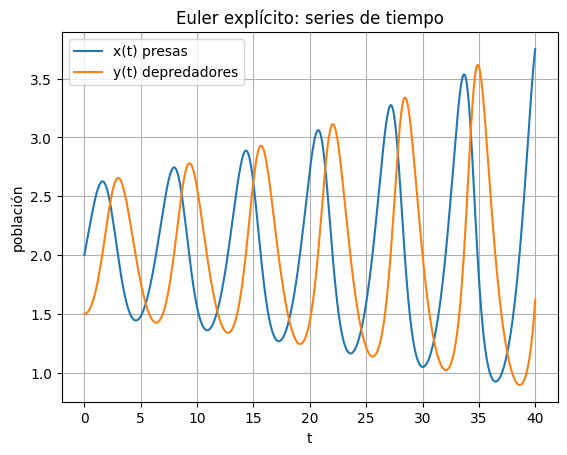

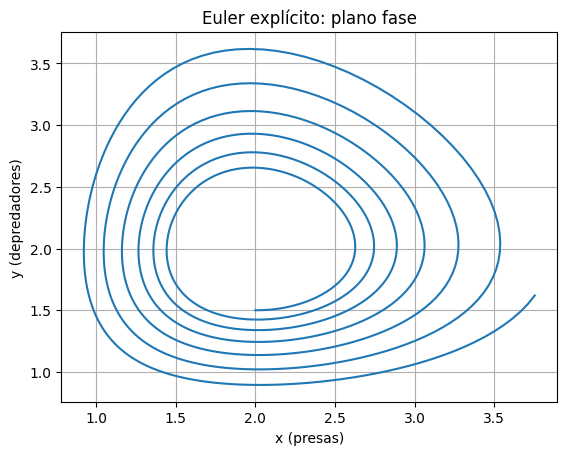

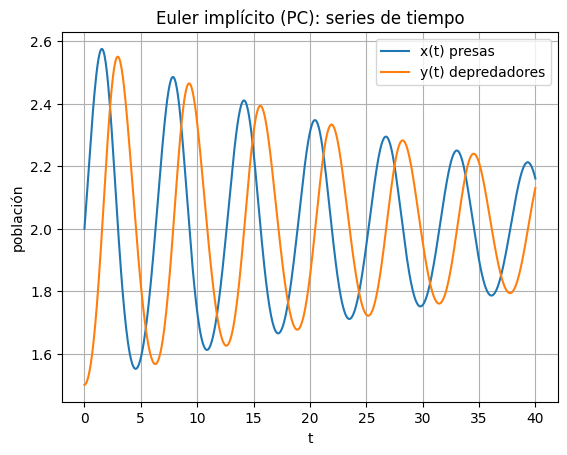

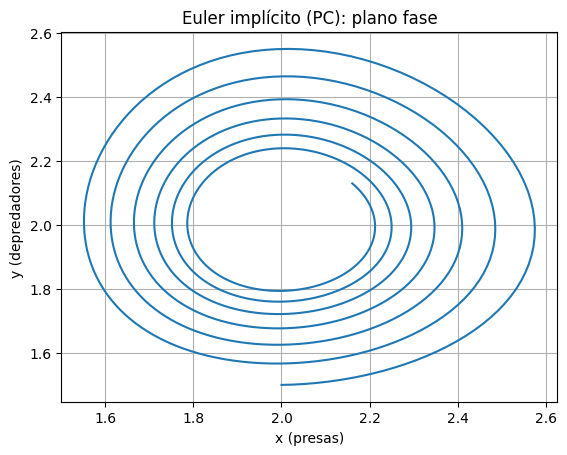

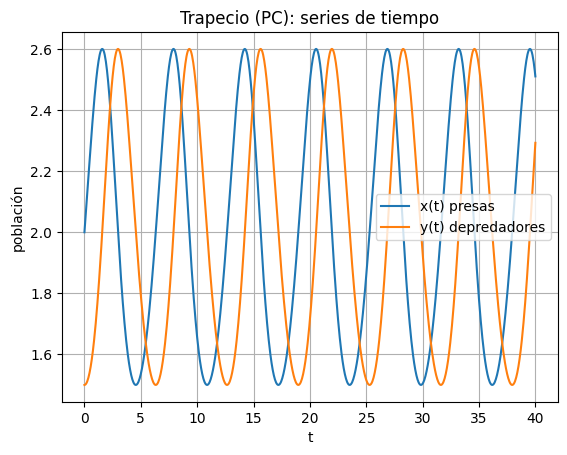

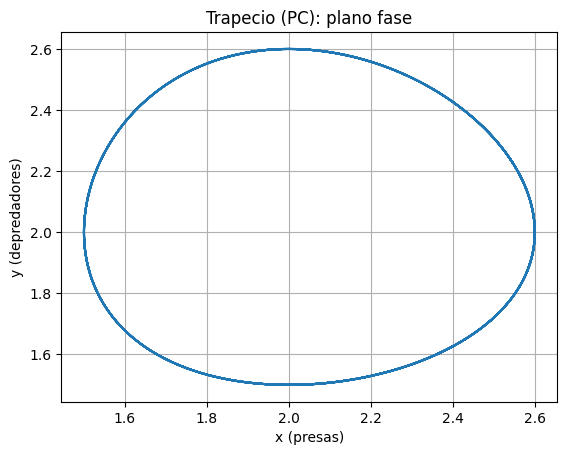

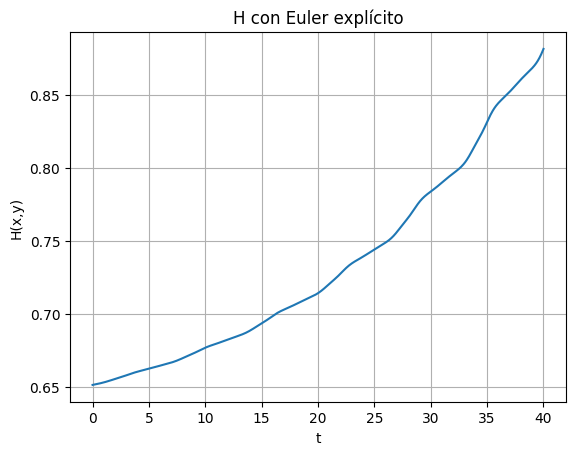

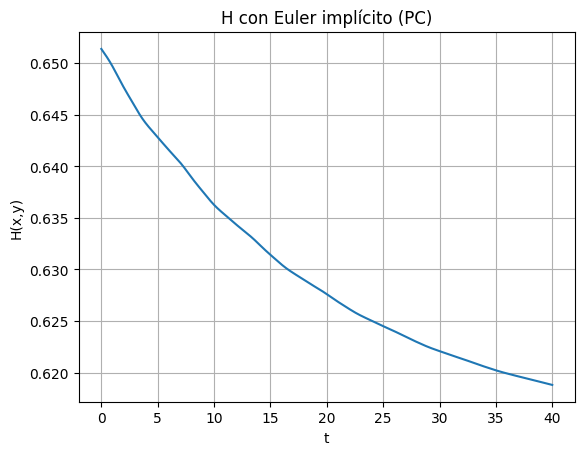

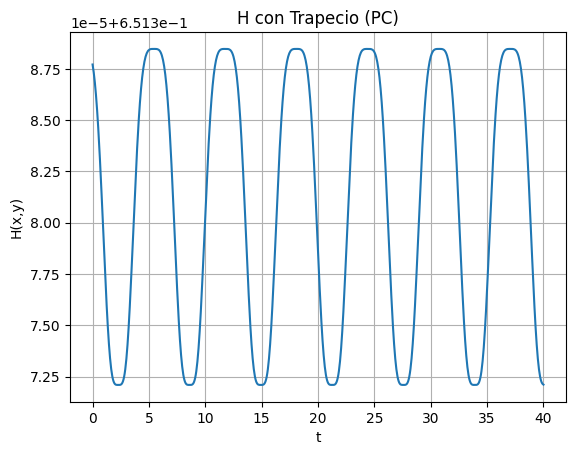

In [3]:
# 3) Ejecución de ejemplo (pueden modificar)

params = {"alpha": 1.0, "beta": 0.5, "gamma": 1.0, "delta": 0.5}
t0, tf, h = 0.0, 40.0, 0.05
z0 = np.array([2.0, 1.5], dtype=float)

# Euler explícito
tE, zE = euler_explicito(presa_depredador, t0, tf, z0, h, params)
graficar_tiempo(tE, zE, titulo="Euler explícito: series de tiempo")
graficar_fase(zE, titulo="Euler explícito: plano fase")

# Euler implícito (PC)
tI, zI, convI = euler_implicito_pc(presa_depredador, t0, tf, z0, h, params)
graficar_tiempo(tI, zI, titulo="Euler implícito (PC): series de tiempo")
graficar_fase(zI, titulo="Euler implícito (PC): plano fase")

# Trapecio (PC)
tT, zT, convT = trapecio_pc(presa_depredador, t0, tf, z0, h, params)
graficar_tiempo(tT, zT, titulo="Trapecio (PC): series de tiempo")
graficar_fase(zT, titulo="Trapecio (PC): plano fase")

# (Opcional) Invariante
H_E = H_invariante(zE, params)
H_I = H_invariante(zI, params)
H_T = H_invariante(zT, params)

graficar_invariante(tE, H_E, titulo="H con Euler explícito")
graficar_invariante(tI, H_I, titulo="H con Euler implícito (PC)")
graficar_invariante(tT, H_T, titulo="H con Trapecio (PC)")


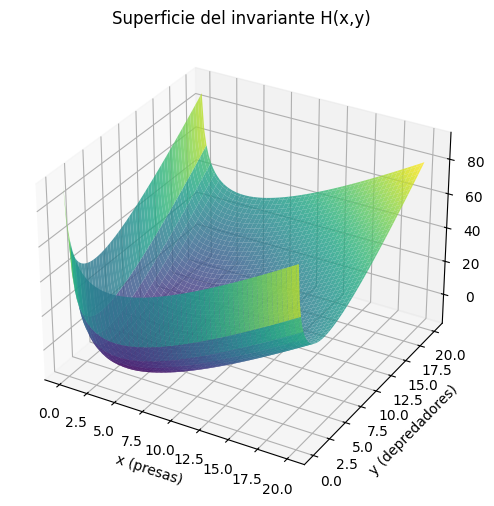

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para proyecciones 3D

def H_func(x, y, params):
    alpha = params["alpha"]
    beta  = params["beta"]
    gamma = params["gamma"]
    delta = params["delta"]
    return delta*x - gamma*np.log(x) + beta*y - alpha*np.log(y)

# --- Parámetros del modelo ---
params = {"alpha": 20.0, "beta": 5, "gamma": 20.0, "delta": 5}

# --- Rango de valores (x,y) ---
x = np.linspace(0.1, 20, 100)   # evitamos x=0
y = np.linspace(0.1, 20, 100)   # evitamos y=0
X, Y = np.meshgrid(x, y)

# --- Evaluar H ---
Z = H_func(X, Y, params)

# --- Gráfica 3D ---
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.8)

ax.set_xlabel("x (presas)")
ax.set_ylabel("y (depredadores)")
ax.set_zlabel("H(x,y)")
ax.set_title("Superficie del invariante H(x,y)")

plt.show()


In [5]:
#%pip install plotly
import numpy as np
import plotly.graph_objects as go

def H_func(x, y, params):
    alpha = params["alpha"]; beta = params["beta"]
    gamma = params["gamma"]; delta = params["delta"]
    return delta*x - gamma*np.log(x) + beta*y - alpha*np.log(y)

params = {"alpha": 20.0, "beta": 5, "gamma": 20.0, "delta": 5}

x = np.linspace(0.1, 20, 100)
y = np.linspace(0.1, 20, 100)
X, Y = np.meshgrid(x, y)
Z = H_func(X, Y, params)

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])
fig.update_layout(
    title="Superficie H(x,y)",
    scene=dict(
        xaxis_title="x (presas)",
        yaxis_title="y (depredadores)",
        zaxis_title="H(x,y)"
    ),
    width=800, height=600
)
fig.show()


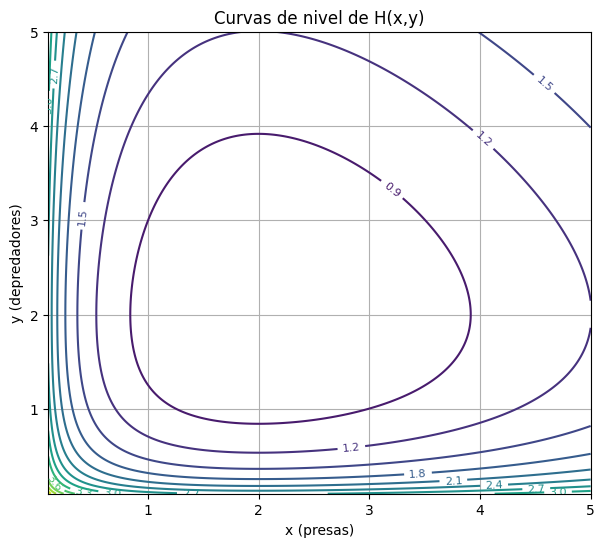

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def H_func(x, y, params):
    alpha = params["alpha"]
    beta  = params["beta"]
    gamma = params["gamma"]
    delta = params["delta"]
    return delta*x - gamma*np.log(x) + beta*y - alpha*np.log(y)

# --- Parámetros del modelo ---
params = {"alpha": 1.0, "beta": 0.5, "gamma": 1.0, "delta": 0.5}

# --- Rango de la malla (evitar 0 para el log) ---
x = np.linspace(0.1, 5.0, 400)
y = np.linspace(0.1, 5.0, 400)
X, Y = np.meshgrid(x, y)

# --- Evaluar H en la malla ---
Z = H_func(X, Y, params)

# --- Curvas de nivel de H ---
plt.figure(figsize=(7,6))
cs = plt.contour(X, Y, Z, levels=15)  # ajusta 'levels' a tu gusto
plt.clabel(cs, inline=True, fontsize=8, fmt="%.1f")

plt.xlabel("x (presas)")
plt.ylabel("y (depredadores)")
plt.title("Curvas de nivel de H(x,y)")
plt.grid(True)
plt.axis("tight")
plt.show()


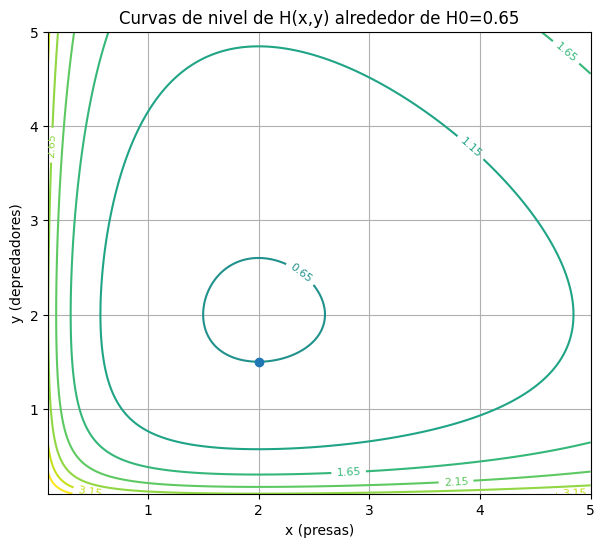

In [8]:
# Condición inicial
x0, y0 = 2.0, 1.5
H0 = H_func(np.array([x0]), np.array([y0]), params).item()

# Niveles alrededor de H0
delta_levels = np.linspace(-3.0, 3.0, 13)  # ajusta amplitud y densidad
levels = H0 + delta_levels

plt.figure(figsize=(7,6))
cs = plt.contour(X, Y, Z, levels=levels)
plt.clabel(cs, inline=True, fontsize=8, fmt="%.2f")
plt.plot([x0], [y0], marker="o")  # marca la condición inicial

plt.xlabel("x (presas)")
plt.ylabel("y (depredadores)")
plt.title(f"Curvas de nivel de H(x,y) alrededor de H0={H0:.2f}")
plt.grid(True)
plt.axis("tight")
plt.show()


## <span style="font-family:Georgia; text-align:center;">Discusión</span> 
<span style="font-family:Georgia;">


- Comparen cualitativamente los resultados de los tres métodos para varios $h$.  
- ¿Qué método mantiene mejor la cualidad de órbitas cerradas?  
- ¿Observaron deriva en $H$? ¿Cuál método la reduce más?  
- ¿Qué condiciones parecen favorecer la convergencia del corrector?